## **CNN_LSTM Model Tuning on Input Variations**
---
This notebook deals with building a model with different input specifications to determine at what configurations, the model generates the lowest error (measured in terms of MSE). Other Model hyperparameters like the number of LFLBs, number of LSTMs, training epochs etc. are fixed across the different sequence sizes and image sizes.

---
Parameters used: 
- sequence_size: The number of images that are fed as input to the model
- image_size: The size of the image as n*n pixels

---
Organizing the Data: 
- Input images to be present inside the ***INSAT3D_TIR1_PNG*** folder either inside the Drive or on local
- Images to be named as ***0.png*** to ***44.png***
- Generated model is saved as an h5 file inside the ***MeghNA_Models*** directory on drive or local.

In [ ]:
# Run this cell always before generating any model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv

# **CNN_LSTM_MODEL 1 Config:**
---
Input Specs:
- Sequence Size: 4
- Input Image Size: 300 * 300
---
Model Architecture:
- BatchNormalization
- 3 LFLBs (2dConv + BN + 2dConv + BN + MaxPool + Dropout)
- Flatten
- 2 LSTMS (n_units = 512)
- Dense (300 * 300)
---
Training Overview:
- Epochs: 100
- Training Data: 
  - X: Image 0 - Image 3
  - Y: Image 4
- Validation Data:
  - X: Image 4 - Image 7
  - Y: Image 8
- Test Data:
  - X: Image 8 - Image 11
  - Y: Image 12
- MSE:
  - Training MSE&nbsp;&nbsp;&nbsp;: ***3407.5256***
  - Validation MSE: ***3035.1245***
---
**Filename for Saved Model: [3CNN_2LSTM_Sequence_4_Size_300_Epoch_100].h5**

In [ ]:
import os
images = []
# Load in the images
for filepath in os.listdir('drive/My Drive/INSAT3D_TIR1_PNG'):
    img = cv.imread('drive/My Drive/INSAT3D_TIR1_PNG/{0}'.format(filepath),0)
    images.append(cv.resize(img,(300,300),interpolation=cv.INTER_AREA))
first_frame = images[0]

In [ ]:
first_frame.shape

(300, 300)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, LSTM, Dense, TimeDistributed, InputLayer, Reshape, BatchNormalization
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D

model = Sequential()

# model.add(InputLayer(input_shape=(15,300,300,1)))
model.add(BatchNormalization(input_shape=(4,300,300,1)))
# model.add(MaxPooling2D(pool_size=(4,4)))

model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(units=512, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(LSTM(units=512, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=False))
model.add(Dense(90000))
# model.add(Reshape((300,300,1)))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 4, 300, 300, 1)    4         
_________________________________________________________________
time_distributed_20 (TimeDis (None, 4, 298, 298, 32)   320       
_________________________________________________________________
time_distributed_21 (TimeDis (None, 4, 298, 298, 32)   128       
_________________________________________________________________
time_distributed_22 (TimeDis (None, 4, 296, 296, 32)   9248      
_________________________________________________________________
time_distributed_23 (TimeDis (None, 4, 296, 296, 32)   128       
_________________________________________________________________
time_distributed_24 (TimeDis (None, 4, 74, 74, 32)     0         
_________________________________________________________________
time_distributed_25 (TimeDis (None, 4, 74, 74, 32)    

In [ ]:
X = np.array(images)[0:4]
X.shape

(4, 300, 300)

In [ ]:
model.fit(X.reshape(1,4,300,300,1), np.asarray(images[4]).reshape(1,90000),
          validation_data = (np.asarray(images[4:8]).reshape(1,4,300,300,1), np.asarray(images[8]).reshape(1,90000)),
          batch_size=4, epochs=100)

Train on 1 samples, validate on 1 samples
Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 9935.6738 - accuracy: 0.0000e+00 - val_loss: 9185.2559 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 9933.7188 - accuracy: 0.0000e+00 - val_loss: 9178.2158 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 9922.7109 - accuracy: 0.0000e+00 - val_loss: 9163.3711 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 9902.4033 - accuracy: 0.0000e+00 - val_loss: 9138.6084 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 9870.2051 - accuracy: 0.0000e+00 - val_loss: 9099.7734 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 9805.2881 - accuracy: 0.0000e+00 - val_loss: 9043.5957 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [=============================

In [ ]:
output = model.predict(np.array(images[8:12]).reshape(1,4,300,300,1))

In [ ]:
output.shape

(1, 90000)

In [ ]:
output = output.reshape(1,300,300)
output.shape

(1, 300, 300)

Text(0.5, 1.0, 'Predicted 12th Image')

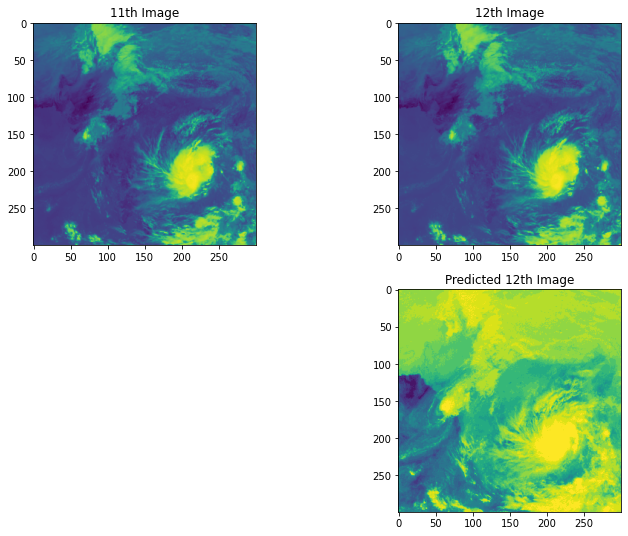

In [ ]:
plt.figure(figsize=(12,9))

plt.subplot(221)
plt.imshow(images[10])
plt.title("11th Image")

plt.subplot(222)
plt.imshow(images[11])
plt.title("12th Image")

plt.subplot(224)
plt.imshow(np.asarray(output[0,:,:].reshape(300,300), 'int'))
plt.title("Predicted 12th Image")

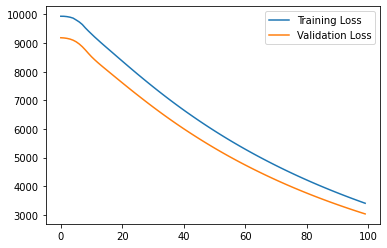

In [ ]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss.head()
plt.plot(loss['loss'], label='Training Loss')
plt.plot(loss['val_loss'], label='Validation Loss')
plt.legend()

In [ ]:
model.save('drive/My Drive/MeghNA_Models/[3CNN_2LSTM_Sequence_4_Size_300_Epoch_100].h5')

# **CNN_LSTM_MODEL 2 Config:**
---
Input Specs:
- Sequence Size: 4
- Input Image Size: 150 * 150
---
Model Architecture:
- BatchNormalization
- 3 LFLBs (2dConv + BN + 2dConv + BN + MaxPool + Dropout)
- Flatten
- 2 LSTMS (n_units = 512)
- Dense (150 * 150)
---
Training Overview:
- Epochs: 100
- Training Data: 
  - X: Image 0 - Image 3
  - Y: Image 4
- Validation Data:
  - X: Image 4 - Image 7
  - Y: Image 8
- Test Data:
  - X: Image 8 - Image 11
  - Y: Image 12
- MSE:
  - Training MSE&nbsp;&nbsp;&nbsp;: ***3384.0833***
  - Validation MSE: ***3016.1423***
---
**Filename for Saved Model: [3CNN_2LSTM_Sequence_4_Size_150_Epoch_100].h5**

In [ ]:
import os
images = []
# Load in the images
for filepath in os.listdir('drive/My Drive/INSAT3D_TIR1_PNG'):
    img = cv.imread('drive/My Drive/INSAT3D_TIR1_PNG/{0}'.format(filepath),0)
    images.append(cv.resize(img,(150,150),interpolation=cv.INTER_AREA))
first_frame = images[0]

(150, 150)


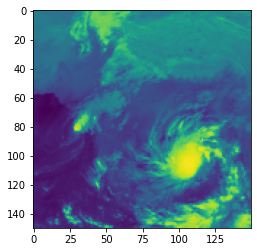

In [ ]:
print(first_frame.shape)
plt.imshow(first_frame)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, LSTM, Dense, TimeDistributed, InputLayer, Reshape, BatchNormalization
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D

model = Sequential()
model.add(BatchNormalization(input_shape=(4,150,150,1)))

model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(units=512, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(LSTM(units=512, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=False))
model.add(Dense(22500))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_15 (Batc (None, 4, 150, 150, 1)    4         
_________________________________________________________________
time_distributed_39 (TimeDis (None, 4, 148, 148, 32)   320       
_________________________________________________________________
time_distributed_40 (TimeDis (None, 4, 148, 148, 32)   128       
_________________________________________________________________
time_distributed_41 (TimeDis (None, 4, 146, 146, 32)   9248      
_________________________________________________________________
time_distributed_42 (TimeDis (None, 4, 146, 146, 32)   128       
_________________________________________________________________
time_distributed_43 (TimeDis (None, 4, 36, 36, 32)     0         
_________________________________________________________________
time_distributed_44 (TimeDis (None, 4, 36, 36, 32)    

In [ ]:
X = np.array(images)[0:4]
X.shape

(4, 150, 150)

In [ ]:
model.fit(X.reshape(1,4,150,150,1), np.asarray(images[4]).reshape(1,22500),
          validation_data = (np.asarray(images[4:8]).reshape(1,4,150,150,1), np.asarray(images[8]).reshape(1,22500)),
          batch_size=4, epochs=100)

Train on 1 samples, validate on 1 samples
Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 9909.2041 - val_loss: 9159.5928
Epoch 2/100
1/1 [==============================] - 1s 664ms/step - loss: 9905.8135 - val_loss: 9157.9238
Epoch 3/100
1/1 [==============================] - 1s 693ms/step - loss: 9898.1055 - val_loss: 9155.2949
Epoch 4/100
1/1 [==============================] - 1s 671ms/step - loss: 9879.9463 - val_loss: 9150.7949
Epoch 5/100
1/1 [==============================] - 1s 678ms/step - loss: 9861.6875 - val_loss: 9143.3203
Epoch 6/100
1/1 [==============================] - 1s 660ms/step - loss: 9806.2959 - val_loss: 9131.5869
Epoch 7/100
1/1 [==============================] - 1s 667ms/step - loss: 9739.0498 - val_loss: 9113.3906
Epoch 8/100
1/1 [==============================] - 1s 669ms/step - loss: 9640.2705 - val_loss: 9084.5547
Epoch 9/100
1/1 [==============================] - 1s 706ms/step - loss: 9545.8389 - val_loss: 9042.5576
Epoch 10/100
1/1

In [ ]:
output = model.predict(np.array(images[8:12]).reshape(1,4,150,150,1))
output.shape

(1, 22500)

In [ ]:
output = output.reshape(1,150,150)
output.shape

(1, 150, 150)

Text(0.5, 1.0, 'Predicted 12th Image')

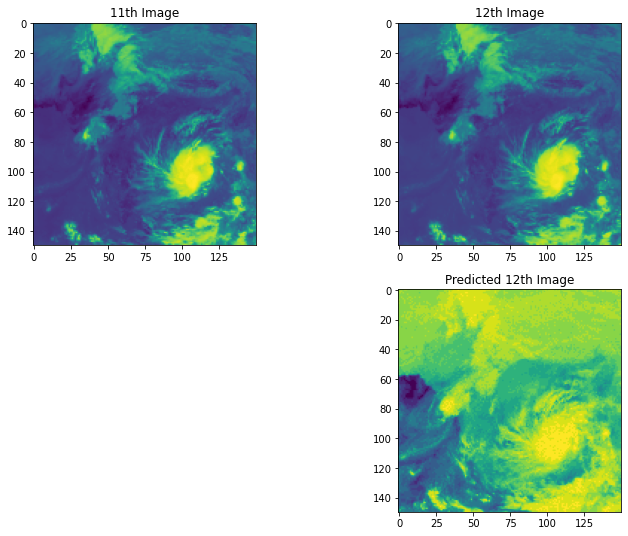

In [ ]:
plt.figure(figsize=(12,9))

plt.subplot(221)
plt.imshow(images[10])
plt.title("11th Image")

plt.subplot(222)
plt.imshow(images[11])
plt.title("12th Image")

plt.subplot(224)
plt.imshow(np.asarray(output[0,:,:].reshape(150,150), 'int'))
plt.title("Predicted 12th Image")

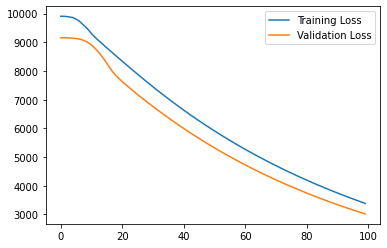

In [ ]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss.head()
plt.plot(loss['loss'], label='Training Loss')
plt.plot(loss['val_loss'], label='Validation Loss')
plt.legend()

In [ ]:
model.save('drive/My Drive/MeghNA_Models/[3CNN_2LSTM_Sequence_4_Size_150_Epoch_100].h5')

# **CNN_LSTM_MODEL 3 Config:**
---
Input Specs:
- Sequence Size: 15
- Input Image Size: 300 * 300
---
Model Architecture:
- BatchNormalization
- 3 LFLBs (2dConv + BN + 2dConv + BN + MaxPool + Dropout)
- Flatten
- 2 LSTMS (n_units = 512)
- Dense (300 * 300)
---
Training Overview:
- Epochs: 100
- Training Data: 
  - X: Image 0 - Image 14
  - Y: Image 15
- Validation Data: 
  - X: Image 15 - Image 29
  - Y: Image 30
- Test Data:
  - X: Image 30 - Image 44
  - Y: Image 45
- MSE:
  - Training MSE&nbsp;&nbsp;&nbsp;: ***4623.8647***
  - Validation MSE: ***3627.8186***
---
**Filename for Saved Model: [3CNN_2LSTM_Sequence_15_Size_300_Epoch_100].h5**

In [ ]:
import os
images = []
# Load in the images
for filepath in os.listdir('drive/My Drive/INSAT3D_TIR1_PNG'):
    img = cv.imread('drive/My Drive/INSAT3D_TIR1_PNG/{0}'.format(filepath),0)
    images.append(cv.resize(img,(300,300),interpolation=cv.INTER_AREA))
first_frame = images[0]

(300, 300)


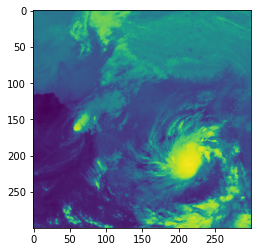

In [ ]:
print(first_frame.shape)
plt.imshow(first_frame)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, LSTM, Dense, TimeDistributed, InputLayer, Reshape, BatchNormalization
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D

model = Sequential()
model.add(BatchNormalization(input_shape=(15,300,300,1)))

model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(units=512, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(LSTM(units=512, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=False))
model.add(Dense(90000))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 15, 300, 300, 1)   4         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 15, 298, 298, 32)  320       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 15, 298, 298, 32)  128       
_________________________________________________________________
time_distributed_3 (TimeDist (None, 15, 296, 296, 32)  9248      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 15, 296, 296, 32)  128       
_________________________________________________________________
time_distributed_5 (TimeDist (None, 15, 74, 74, 32)    0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 15, 74, 74, 32)   

In [ ]:
X = np.array(images)[0:15]
X.shape

(15, 300, 300)

In [ ]:
model.fit(X.reshape(1,15,300,300,1), np.asarray(images[15]).reshape(1,90000),
          validation_data = (np.asarray(images[15:30]).reshape(1,15,300,300,1), np.asarray(images[30]).reshape(1,90000)),
          batch_size=15, epochs=100)

Train on 1 samples, validate on 1 samples
Epoch 1/100
1/1 [==============================] - 12s 12s/step - loss: 12241.1289 - val_loss: 10058.3184
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 12238.4951 - val_loss: 10048.2080
Epoch 3/100
1/1 [==============================] - 7s 7s/step - loss: 12222.6943 - val_loss: 10024.7725
Epoch 4/100
1/1 [==============================] - 7s 7s/step - loss: 12191.4883 - val_loss: 9983.8877
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 12136.8320 - val_loss: 9926.8369
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 12074.6748 - val_loss: 9857.2480
Epoch 7/100
1/1 [==============================] - 7s 7s/step - loss: 11996.6406 - val_loss: 9774.6289
Epoch 8/100
1/1 [==============================] - 7s 7s/step - loss: 11905.5078 - val_loss: 9676.2578
Epoch 9/100
1/1 [==============================] - 7s 7s/step - loss: 11788.4600 - val_loss: 9571.3652
Epoch 10/100
1/1 [========

In [ ]:
output = model.predict(np.array(images[30:45]).reshape(1,15,300,300,1))
output = output.reshape(1,300,300)
output.shape

(1, 300, 300)

Text(0.5, 1.0, 'Predicted 46th Image')

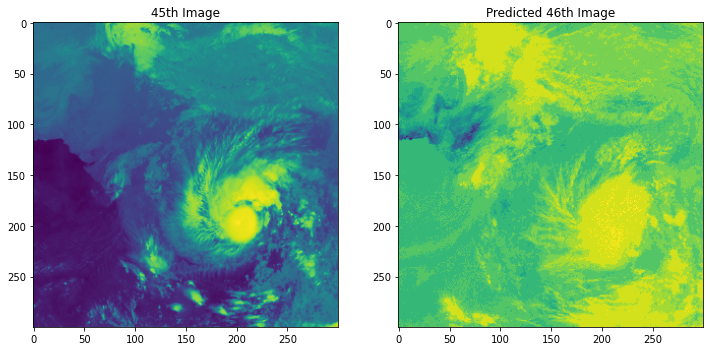

In [ ]:
plt.figure(figsize=(12,9))

plt.subplot(121)
plt.imshow(images[44])
plt.title("45th Image")

plt.subplot(122)
plt.imshow(np.asarray(output[0,:,:].reshape(300,300), 'int'))
plt.title("Predicted 46th Image")

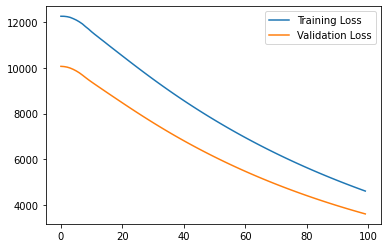

In [ ]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss.head()
plt.plot(loss['loss'], label='Training Loss')
plt.plot(loss['val_loss'], label='Validation Loss')
plt.legend()

In [ ]:
model.save('drive/My Drive/MeghNA_Models/[3CNN_2LSTM_Sequence_15_Size_300_Epoch_100].h5')

# **CNN_LSTM_MODEL 4 Config:**
---
Input Specs:
- Sequence Size: 15
- Input Image Size: 150 * 150
---
Model Architecture:
- BatchNormalization
- 3 LFLBs (2dConv + BN + 2dConv + BN + MaxPool + Dropout)
- Flatten
- 2 LSTMS (n_units = 512)
- Dense (150 * 150)
---
Training Overview:
- Epochs: 100
- Training Data: 
  - X: Image 0 - Image 14
  - Y: Image 15
- Validation Data: 
  - X: Image 15 - Image 29
  - Y: Image 30
- Test Data:
  - X: Image 30 - Image 44
  - Y: Image 45
- MSE:
  - Training MSE&nbsp;&nbsp;&nbsp;: ***4553.7915***
  - Validation MSE: ***3563.4980***
---
**Filename for Saved Model: [3CNN_2LSTM_Sequence_15_Size_150_Epoch_100].h5**

In [ ]:
import os
images = []
# Load in the images
for filepath in os.listdir('drive/My Drive/INSAT3D_TIR1_PNG'):
    img = cv.imread('drive/My Drive/INSAT3D_TIR1_PNG/{0}'.format(filepath),0)
    images.append(cv.resize(img,(150,150),interpolation=cv.INTER_AREA))
first_frame = images[0]

(150, 150)


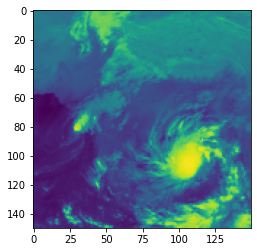

In [ ]:
print(first_frame.shape)
plt.imshow(first_frame)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, LSTM, Dense, TimeDistributed, InputLayer, Reshape, BatchNormalization
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D

model = Sequential()
model.add(BatchNormalization(input_shape=(15,150,150,1)))

model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(units=512, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(LSTM(units=512, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=False))
model.add(Dense(22500))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 15, 150, 150, 1)   4         
_________________________________________________________________
time_distributed_20 (TimeDis (None, 15, 148, 148, 32)  320       
_________________________________________________________________
time_distributed_21 (TimeDis (None, 15, 148, 148, 32)  128       
_________________________________________________________________
time_distributed_22 (TimeDis (None, 15, 146, 146, 32)  9248      
_________________________________________________________________
time_distributed_23 (TimeDis (None, 15, 146, 146, 32)  128       
_________________________________________________________________
time_distributed_24 (TimeDis (None, 15, 36, 36, 32)    0         
_________________________________________________________________
time_distributed_25 (TimeDis (None, 15, 36, 36, 32)   

In [ ]:
X = np.array(images)[0:15]
X.shape

(15, 150, 150)

In [ ]:
model.fit(X.reshape(1,15,150,150,1), np.asarray(images[15]).reshape(1,22500),
          validation_data = (np.asarray(images[15:30]).reshape(1,15,150,150,1), np.asarray(images[30]).reshape(1,22500)),
          batch_size=15, epochs=100)

Train on 1 samples, validate on 1 samples
Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 12215.8008 - val_loss: 10031.7852
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 12211.1611 - val_loss: 10027.9082
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 12194.7520 - val_loss: 10019.7119
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 12159.7012 - val_loss: 9999.9756
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 12110.5850 - val_loss: 9949.1738
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 12039.3262 - val_loss: 9863.4707
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 11954.1777 - val_loss: 9769.6729
Epoch 8/100
1/1 [==============================] - 2s 2s/step - loss: 11847.2314 - val_loss: 9668.7100
Epoch 9/100
1/1 [==============================] - 2s 2s/step - loss: 11745.1475 - val_loss: 9548.0566
Epoch 10/100
1/1 [==========

In [ ]:
output = model.predict(np.array(images[30:45]).reshape(1,15,150,150,1))
output = output.reshape(1,150,150)
output.shape

(1, 150, 150)

Text(0.5, 1.0, 'Predicted 46th Image')

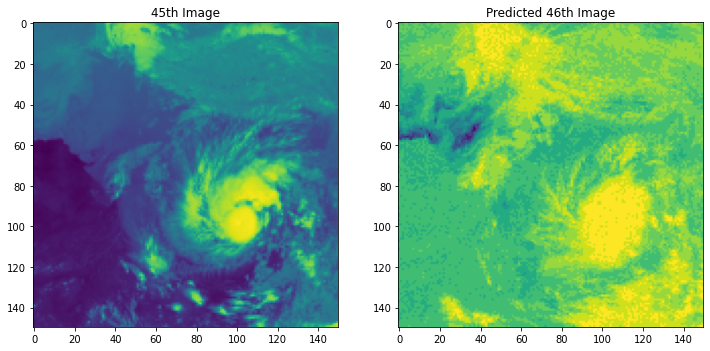

In [ ]:
plt.figure(figsize=(12,9))

plt.subplot(121)
plt.imshow(images[44])
plt.title("45th Image")

plt.subplot(122)
plt.imshow(np.asarray(output[0,:,:].reshape(150,150), 'int'))
plt.title("Predicted 46th Image")

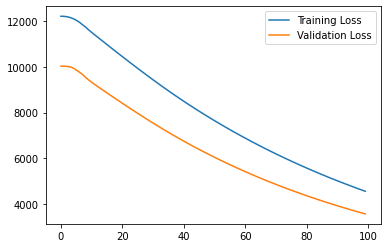

In [ ]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss.head()
plt.plot(loss['loss'], label='Training Loss')
plt.plot(loss['val_loss'], label='Validation Loss')
plt.legend()

In [ ]:
model.save('drive/My Drive/MeghNA_Models/[3CNN_2LSTM_Sequence_15_Size_150_Epoch_100].h5')